In [1]:
### ATOC7500 Lecture #4 - LSQ_OLS.ipynb
### coded by Prof Libby Barnes (CSU) with additional updates/coding by Prof. Jennifer Kay (CU)
### last updated September 14, 2020
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import xarray
import pandas as pd   ##pandas reads in .csv.
from scipy import stats, odr
import numpy.linalg as LA
from sklearn import datasets, linear_model

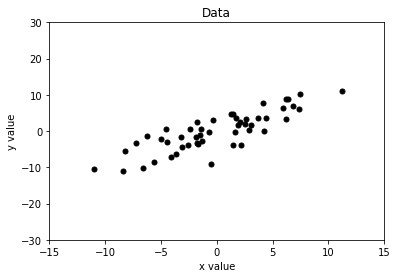

In [2]:
## Make some data and plot it
LW = 2
x = 5.*np.random.randn(50)
y = x+5.+3.*np.random.randn(len(x))
x = x - np.mean(x)
y = y - np.mean(y)
plt.plot(x,y,'ok',markersize = 5, label = 'DATA')
plt.ylabel('y value')
plt.xlabel('x value')
plt.xlim([-15,15])
plt.ylim([-30, 30])
plt.title('Data')
plt.show()

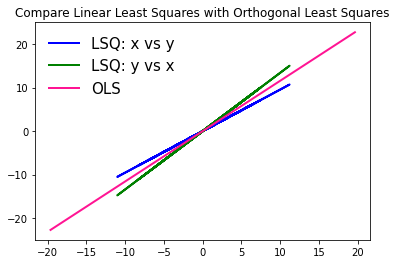

In [5]:
# LSQ - X VERSUS Y
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
plt.plot(x,intercept+x*slope,'-',color = 'blue', label = 'LSQ: x vs y', linewidth = LW)
# LSQ - Y VERSUS X
slope, intercept, r_value, p_value, std_err = stats.linregress(y,x)
plt.plot(x,(1./slope)*x - intercept/slope,'-',color = 'green', label = 'LSQ: y vs x', linewidth = LW)
# OLS
C = np.cov([x,y], rowvar = 1)
LAM, E = LA.eig(C)
plt.plot(np.array([-E[0][1],E[0][1]])*30.,np.array([-E[1][1],E[1][1]])*30.,'-', color = 'deeppink', linewidth = LW, label  = 'OLS')
plt.legend(frameon = 0, loc = 'upper left', fontsize = 15)
plt.title('Compare Linear Least Squares with Orthogonal Least Squares');